In [24]:
import pandas as pd #for a data processing
import sqlite3 #for a database process

#read csv file
df_financial=pd.read_csv('/content/Financials.csv')
df_financial.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [25]:
#change date fromart to datetime
df_financial['Date']=pd.to_datetime(df_financial['Date'])

#replace space in columns title
df_financial.columns=df_financial.columns.str.replace(" ","_")
df_financial.head()

,Segment,Country,_Product_,_Discount_Band_,_Units_Sold_,_Manufacturing_Price_,_Sale_Price_,_Gross_Sales_,_Discounts_,__Sales_,_COGS_,_Profit_,Date,Month_Number,_Month_Name_,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",2014-01-06,6,June,2014


In [26]:
#create a database
conn=sqlite3.connect("financial.db")
cursor=conn.cursor()

#create a table
cursor.execute('''
CREATE TABLE IF NOT EXISTS financial (
_Product_ TEXT,
Segment TEXT,
Country TEXT,
_Gross_Sales_ INTEGER,
_Profit_ INTEGER,
Year INTEGER,
Month TEXT,
Date INTEGER
)
''')

# Insert financial data into the table
df_financial.to_sql("financial", conn, if_exists="replace", index=False)

# Commit and close connection
conn.commit()

In [27]:
import pandas as pd #for a data processing
import sqlite3 #for a database process


conn = sqlite3.connect("financial.db")
cursor = conn.cursor()

#1.yearly profit from all segment by using CAST function

df_yearly_profit=pd.read_sql("SELECT Segment,Year,_Profit_,SUM(CAST(REPLACE(REPLACE(_Profit_,'$',''),',','') AS REAL)) AS yearly_profit FROM financial GROUP BY Segment,Year ORDER BY Year DESC",conn)
# Format the 'yearly_profit' column as currency in pandas
df_yearly_profit['yearly_profit'] = df_yearly_profit['yearly_profit'].apply(lambda x: '${:.2f}'.format(x))
print(df_yearly_profit)  # Print the results


#2.yearly sales from all segment by using CAST function

df_yearly_sales=pd.read_sql("SELECT Segment,Year,__Sales_,SUM(CAST(REPLACE(REPLACE(__Sales_,'$',''),',','') AS REAL)) AS yearly_sales FROM financial GROUP BY Segment,Year ORDER BY Year DESC",conn)
# Format the 'yearly_sales' column as currency in pandas
df_yearly_sales['yearly_sales'] = df_yearly_sales['yearly_sales'].apply(lambda x: '${:.2f}'.format(x))
print(df_yearly_sales)  # Print the results


#3.Top 3 segment per profilt

df_highest_profit=pd.read_sql("SELECT Segment,_Profit_,SUM(CAST(REPLACE(REPLACE(_Profit_,'$',''),',','') AS REAL)) AS highest_profit FROM financial GROUP BY Segment ORDER BY _Profit_ DESC LIMIT 3",conn)
# Format the 'highest_profit' column as currency in pandas
df_highest_profit['highest_profit'] = df_highest_profit['highest_profit'].apply(lambda x: '${:.2f}'.format(x)) # Changed df_yearly_profit to df_highest_profit
print(df_highest_profit)  # Print the results


#4.Bottom 2 segment per sales

df_lowest_sales=pd.read_sql("SELECT Segment,__Sales_,SUM(CAST(REPLACE(REPLACE(__Sales_,'$',''),',','') AS REAL)) AS lowest_sales FROM financial GROUP BY Segment ORDER BY __Sales_  DESC LIMIT 2", conn)
# Format the 'lowest_sales' column as currency in pandas
df_lowest_sales['lowest_sales'] = df_lowest_sales['lowest_sales'].apply(lambda x: '${:.2f}'.format(x))
print(df_lowest_sales)  # Print the results


#5.Top 5 product per profilt

df_highest_product=pd.read_sql("SELECT _Product_,_Profit_,SUM(CAST(REPLACE(REPLACE(_Profit_,'$',''),',','') AS REAL)) AS highest_product FROM financial GROUP BY _Product_ ORDER BY _Profit_ DESC LIMIT 2",conn)
# Format the 'highest_product' column as currency in pandas
df_highest_product['highest_product'] = df_highest_product['highest_product'].apply(lambda x: '${:.2f}'.format(x)) # Changed df_yearly_profit to df_highest_profit
print(df_highest_product)  # Print the results


#6.highest profit per year

df_year_wise=pd.read_sql("SELECT Year,_Profit_,SUM(CAST(REPLACE(REPLACE(_Profit_,'$',''),',','') AS REAL)) AS year_profit FROM financial GROUP BY Year ORDER BY Year DESC" ,conn)
# Format the 'year_profit' column as currency in pandas
df_year_wise['year_profit'] = df_year_wise['year_profit'].apply(lambda x: '${:.2f}'.format(x)) # Changed df_yearly_profit to df_highest_profit
print(df_year_wise)  # Print the results

#visualisation for yearly profit from all segment



            Segment  Year        _Profit_ yearly_profit
0  Channel Partners  2014     $22,662.00    $1026913.86
1        Enterprise  2014     $13,327.50     $134195.63
2        Government  2014     $16,185.00    $8501527.90
3         Midmarket  2014     $10,890.00     $508339.64
4    Small Business  2014     $47,900.00    $3399244.50
5  Channel Partners  2013      $8,208.00     $289889.28
6        Enterprise  2013      $1,725.00      $28580.00
7        Government  2013   $1,55,250.00    $2886645.28
8         Midmarket  2013      $2,745.00     $151763.45
9    Small Business  2013     $39,400.00     $743924.00
            Segment  Year        __Sales_  yearly_sales
0  Channel Partners  2014     $30,216.00    $1402503.36
1        Enterprise  2014   $3,33,187.50   $15562131.88
2        Government  2014     $32,370.00   $39418575.40
3         Midmarket  2014     $32,670.00    $1835639.64
4    Small Business  2014   $2,87,400.00   $34092244.50
5  Channel Partners  2013     $10,944.00     $39

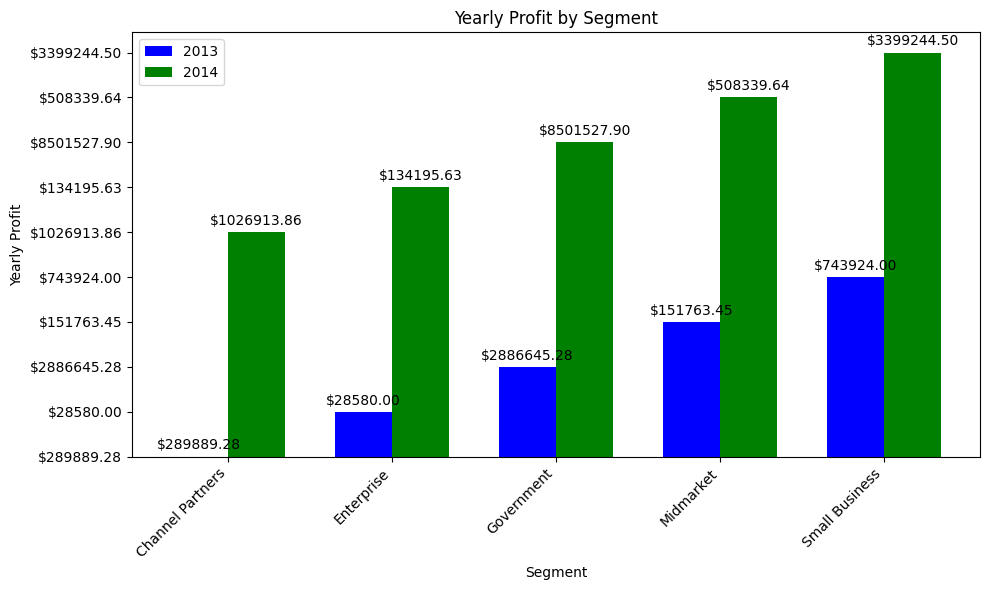

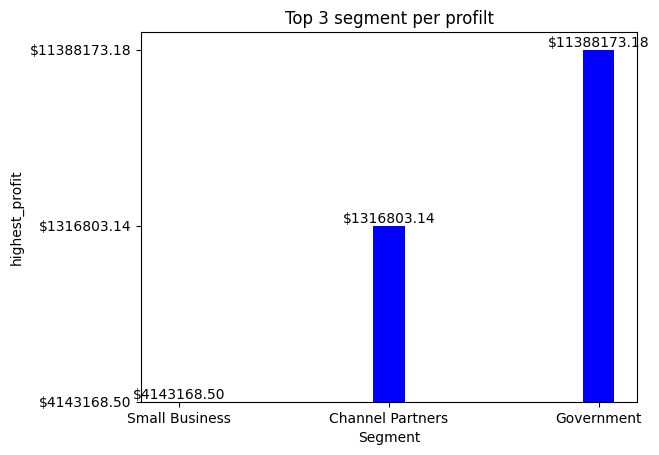

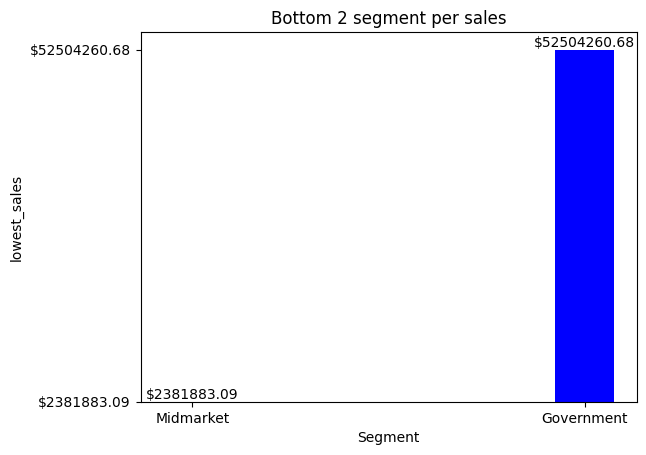

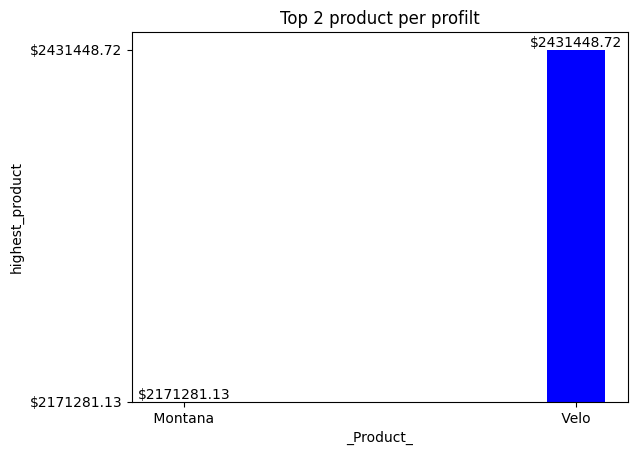

In [28]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

#visualisation for yearly profit from all segment
conn = sqlite3.connect("financial.db")


#1.yearly profit from all segment

years = ["2013", "2014"]  # Change these years as needed

# Get unique segments
segments = df_yearly_profit['Segment'].unique()

# Calculate the yearly profit for each segment for 2013 and 2014
year_1 = []
year_2 = []

for segment in segments:
    profit_2013 = df_yearly_profit[(df_yearly_profit['Segment'] == segment) & (df_yearly_profit['Year'] == 2013)]['yearly_profit'].values
    profit_2014 = df_yearly_profit[(df_yearly_profit['Segment'] == segment) & (df_yearly_profit['Year'] == 2014)]['yearly_profit'].values

    # Handle cases where data might be missing for a year for a particular segment
    year_1.append(profit_2013[0] if len(profit_2013) > 0 else 0)
    year_2.append(profit_2014[0] if len(profit_2014) > 0 else 0)


# Set bar width and positions manually
bar_width = 0.35
x_positions = range(len(segments))  # Simple list-based positioning

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6)) # Adjusted figure size
bars1 = ax.bar([x - bar_width/2 for x in x_positions], year_1, bar_width, label=years[0], color='blue')
bars2 = ax.bar([x + bar_width/2 for x in x_positions], year_2, bar_width, label=years[1], color='green')


# Function to add labels to the bars
def addlabels(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.annotate(f'{value}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

addlabels(bars1,year_1)
addlabels(bars2,year_2)

# Labels and Title
ax.set_xlabel("Segment")
ax.set_ylabel("Yearly Profit")
ax.set_title("Yearly Profit by Segment")
ax.set_xticks(x_positions)
ax.set_xticklabels(segments, rotation=45, ha='right') # Rotated labels for better visibility
ax.legend()

# Show plot
plt.tight_layout() # Added tight_layout to prevent labels from overlapping
plt.show()
conn.close()

#2.Top 3 segment per profilt
for i,value in enumerate(df_highest_profit['highest_profit']):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.bar(df_highest_profit['Segment'],df_highest_profit['highest_profit'],color="blue",width=0.15)
plt.xlabel('Segment')
plt.ylabel('highest_profit')
plt.title('Top 3 segment per profilt')
plt.show()


#3.Bottom 2 segment per sales
for i,value in enumerate(df_lowest_sales['lowest_sales']):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.bar(df_lowest_sales['Segment'],df_lowest_sales['lowest_sales'],color="blue",width=0.15)
plt.xlabel('Segment')
plt.ylabel('lowest_sales')
plt.title('Bottom 2 segment per sales')
plt.show()

#4.Top 2 product per profilt
for i,value in enumerate(df_highest_product['highest_product']):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.bar(df_highest_product['_Product_'],df_highest_product['highest_product'],color="blue",width=0.15)
plt.xlabel('_Product_')
plt.ylabel('highest_product')
plt.title('Top 2 product per profilt')
plt.show()




In [29]:


%%writefile financial_app.py
import streamlit as st
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# --- Database Connection and Data Retrieval ---
conn = sqlite3.connect("financial.db")  # Assuming financial.db is in the same directory

def get_data(query):
    df = pd.read_sql(query, conn)
    return df


# --- Page Configuration ---
st.set_page_config(
    page_title="Financial Dashboard",
    page_icon=":bar_chart:",
    layout="wide"
)

# --- Sidebar ---
st.sidebar.header("Filters")


# --- Main Content ---
st.title("Financial Dashboard")


# --- Yearly Profit by Segment ---
st.header("Yearly Profit by Segment")
df_yearly_profit = get_data("SELECT Segment,Year,_Profit_,SUM(CAST(REPLACE(REPLACE(_Profit_,'$',''),',','') AS REAL)) AS yearly_profit FROM financial GROUP BY Segment,Year ORDER BY Year DESC")
df_yearly_profit['yearly_profit'] = df_yearly_profit['yearly_profit'].apply(lambda x: '${:.2f}'.format(x))

# Plotting Logic (same as before, but using st.pyplot)
years = ["2013", "2014"]
segments = df_yearly_profit['Segment'].unique()

year_1 = []
year_2 = []
# ... (rest of the plotting logic remains the same)

fig, ax = plt.subplots(figsize=(10, 6))
# ... (rest of the plotting logic)
st.pyplot(fig)


# --- Other Charts ---
# Functions for chart generation
def create_bar_chart(df, x_col, y_col, title):
    fig, ax = plt.subplots()
    ax.bar(df[x_col], df[y_col])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    for i, value in enumerate(df[y_col]):
        plt.text(i, value, str(value), ha='center', va='bottom')
    st.pyplot(fig)

# ... (rest of the SQL queries)
df_highest_profit = get_data("SELECT Segment,_Profit_,SUM(CAST(REPLACE(REPLACE(_Profit_,'$',''),',','') AS REAL)) AS highest_profit FROM financial GROUP BY Segment ORDER BY _Profit_ DESC LIMIT 3")
df_highest_profit['highest_profit'] = df_highest_profit['highest_profit'].apply(lambda x: '${:.2f}'.format(x))

df_lowest_sales = get_data("SELECT Segment,__Sales_,SUM(CAST(REPLACE(REPLACE(__Sales_,'$',''),',','') AS REAL)) AS lowest_sales FROM financial GROUP BY Segment ORDER BY __Sales_  DESC LIMIT 2")
df_lowest_sales['lowest_sales'] = df_lowest_sales['lowest_sales'].apply(lambda x: '${:.2f}'.format(x))


df_highest_product = get_data("SELECT _Product_,_Profit_,SUM(CAST(REPLACE(REPLACE(_Profit_,'$',''),',','') AS REAL)) AS highest_product FROM financial GROUP BY _Product_ ORDER BY _Profit_ DESC LIMIT 2")
df_highest_product['highest_product'] = df_highest_product['highest_product'].apply(lambda x: '${:.2f}'.format(x))


# Displaying charts in Streamlit
create_bar_chart(df_highest_profit, 'Segment', 'highest_profit', 'Top 3 Segments by Profit')
create_bar_chart(df_lowest_sales, 'Segment', 'lowest_sales', 'Bottom 2 Segments by Sales')
create_bar_chart(df_highest_product, '_Product_', 'highest_product', 'Top 2 Products by Profit')

conn.close()



Writing financial_app.py
